# Project: Investigate a Dataset (TMDb movie dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset contains information about 10,000 movies collected from The Movie Database(TMDb), including user ratings and revenue. The questions I am trying to answer are: 
* Which genres are most popular from year to year?
* What kinds of properties are associated with movies that have high revenues?
* Which movies are popular year by year?

In [297]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

Loading data:

In [298]:
df = pd.read_csv("tmdb-movies.csv")

Printing few lines:

In [299]:
df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id='duplicates'></a>
Checking for **duplicates**:

In [300]:
df.duplicated().sum()

1

Removing detected duplicated rows.

In [301]:
df.drop_duplicates(inplace = True)

Verifying:

In [302]:
df.duplicated().sum()

0

Checking for data types:

In [303]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
id                      10865 non-null int64
imdb_id                 10855 non-null object
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
homepage                2936 non-null object
director                10821 non-null object
tagline                 8041 non-null object
keywords                9372 non-null object
overview                10861 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              1

`release_date` column needs to be _datetime_ object instead of string.

Converting `release_date` column to _datetime_ object:

In [304]:
import datetime as dt # for convering to date time object
df['release_date'] = df['release_date'].apply(lambda x: dt.datetime.strptime(x, "%m/%d/%y"))

In [305]:
df['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

In [306]:
df['release_date'].tail()

10861   2066-06-15
10862   2066-12-21
10863   2066-01-01
10864   2066-11-02
10865   2066-11-15
Name: release_date, dtype: datetime64[ns]

Looks like there is problem in getting year value for some datetime objects. Let's see which years were converted incorrectly.

We had year range of 1960-2015(both inclusive) but 2066 is showing in above code cell.

Checking list of years after conversion:

In [307]:
years = []
for _ in df['release_date']:
    years.append(_.year)
print(list(set(years)))

[2060, 2061, 2062, 2063, 2064, 2065, 2066, 2067, 2068, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]


There is no logical reason for this error, but historically, Diaries **1969-1979** are known as The Python Years. I think may be this is the reason why years before **1969** were converted to 21st centruy years instead of correct years(like 68 may be interpreted by Python as 2068 instead of 1968).Python experience started in full swing in [1969](https://en.wikipedia.org/wiki/Diaries_1969%E2%80%931979:_The_Python_Years). This is just my way to explain this error.

Correcting year values for 2060-2068(both inclusive) by shifting 100 years back:

In [308]:
d_100 = []
years = 100
days_per_year = 365.24

In [309]:
for d in df['release_date']:
    if d.year >=2060:
        #shifting 100 years back
        tdelta = dt.timedelta(days = (years * days_per_year))
        # corrected date
        d-=tdelta
        d_100.append(d)
    else:
        #as it is
        d_100.append(d)

We are not directly shifting _years_ by -100 in one go because `year` argument is unavailable in `dt.timedelta()` method.

Now **replacing** the original `release_date` column(which was string type) with list `d_100`(which is corrected version of `release_date`).

In [310]:
df['release_date'] = d_100

In [311]:
# verifying
d = []
for _ in df['release_date']:
    d.append(_.year)
print(list(set(d)))

[1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]


### Data Cleaning (Removing undesired columns and handling missing data)

Let's see which columns are important for our analysis:

In [312]:
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08


In [313]:
len(df['id']), len(df['imdb_id']), df.shape[0]

(10865, 10865, 10865)

<a href="#duplicates">Duplicates</a> being removed in earlier part of my analysis, columns `['id', 'imdb_id']` are not important for my analysis. These values are unique for each row, so it's better to use row index instead of these columns.

In [314]:
df.drop(['id', 'imdb_id'], axis = 1, inplace = True)

Let's see if columns `['overview', 'original_title', 'homepage', 'tagline', 'production_companies', 'keywords']` can be considered as considered as **categorical** variables or not.

In [315]:
test_col = ['overview', 'original_title', 'homepage', 'tagline', 'production_companies', 'keywords'] # 6 columns
new_dict = {}
for column in df:
    if column in test_col:
        new_dict[column] = df[column].nunique()
print(new_dict)

{'original_title': 10571, 'homepage': 2896, 'tagline': 7997, 'keywords': 8804, 'overview': 10847, 'production_companies': 7445}


Levels of these 6 columns are very big. If levels for a certain column would have been around 10 then it is ok to consider that column as a categorical variable and faceting could be done based on that categorical column.

But here, levels are 10571, 2896, 7997, 8804, 10847, 7445. Number of rows(10865) are around this much level. Faceting will be inconvenient.

So, removing these columns, too, will not affect the result.

In [316]:
df.drop(['overview', 'original_title', 'homepage', 'tagline', 'production_companies', 'keywords'], axis = 1, inplace = True)

Now handling missing data.

Checking for missing data:

In [317]:
df.isnull().any().sum()

3

3 columns have missing values.

Checking the **incomplete** columns:

In [318]:
df.isnull().any()

popularity      False
budget          False
revenue         False
cast             True
director         True
runtime         False
genres           True
release_date    False
vote_count      False
vote_average    False
release_year    False
budget_adj      False
revenue_adj     False
dtype: bool

Columns `['cast', 'director', 'genres']` have missing values. Let's see  number of missing values for each of these columns to decide whether it is ok to drop them from dataframe.

Creating a subset of `df` which has only incomplete rows:

In [319]:
null_data = df[df.isnull().any(axis = 1)]
null_data.shape[0]

134

In [320]:
round(100*null_data.shape[0]/df.shape[0], 2)

1.23

There are only 134 incomplete rows in aggregate. That's just 1.2 per cent of `df`. Now, let's see incomplete rows count for each column.

In [321]:
miss_count = {}
for column in null_data:
    miss_count[column] = sum(pd.isnull(null_data[column]))

In [322]:
miss_count

{'budget': 0,
 'budget_adj': 0,
 'cast': 76,
 'director': 44,
 'genres': 23,
 'popularity': 0,
 'release_date': 0,
 'release_year': 0,
 'revenue': 0,
 'revenue_adj': 0,
 'runtime': 0,
 'vote_average': 0,
 'vote_count': 0}

In [323]:
76+44+23, round(100*(76+44+23)/df.shape[0], 2) # missing counts for columns: cast, director and genres

(143, 1.32)

I created `null_data` just to know how many incomplete rows are there in `df` in aggregate, and whether it is ok to remove them.

143 is maximum possible rows in `df`,it is still 1.3 per cent of `df`. Removing 143 or 134 rows will not deviate our result. Removing these incomplete rows(134) from `df`:

In [324]:
df.dropna(subset=['cast', 'director', 'genres'], inplace = True)

Verifying:

In [325]:
miss_count = {}
for column in df:
    miss_count[column] = sum(pd.isnull(df[column]))

In [326]:
miss_count

{'budget': 0,
 'budget_adj': 0,
 'cast': 0,
 'director': 0,
 'genres': 0,
 'popularity': 0,
 'release_date': 0,
 'release_year': 0,
 'revenue': 0,
 'revenue_adj': 0,
 'runtime': 0,
 'vote_average': 0,
 'vote_count': 0}

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: Which genres are popular year by year?

I will first sort my data by `release_date` column for year to year analysis.

Sorting by date:

In [327]:
df.sort_values(by = ['release_date'], inplace = True)
df.head(3)

,popularity,budget,revenue,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10152,0.333643,0,0,Peter Cushing|Martita Hunt|Yvonne Monlaur|Fred...,Terence Fisher,85,Horror,1960-01-02,19,6.6,1960,0.0,0.0
10150,0.421043,0,0,Burt Lancaster|Audrey Hepburn|Audie Murphy|Joh...,John Huston,125,Action|Drama|Western,1960-01-02,17,4.9,1960,0.0,0.0
10162,0.194948,0,0,Kenneth More|Dana Wynter|Carl MÃ¶hner|Laurence...,Lewis Gilbert,97,Action|Drama|Foreign|History|War,1960-02-12,12,4.9,1960,0.0,0.0


There are too many columns to deal with. We want to know which genres popular in this time period 1960-2015.<br>For this part of EDA(question 1), I will remove columns that I am not interested in using.

In [328]:
df.columns

Index(['popularity', 'budget', 'revenue', 'cast', 'director', 'runtime',
       'genres', 'release_date', 'vote_count', 'vote_average', 'release_year',
       'budget_adj', 'revenue_adj'],
      dtype='object')

In [329]:
df_r1 = df.drop(['popularity', 'budget', 'revenue', 'cast', 'director', 'runtime', 'vote_count', 'vote_average', 'budget_adj', 'revenue_adj'], axis = 1)
df_r1.head(3)

,genres,release_date,release_year
10152,Horror,1960-01-02,1960
10150,Action|Drama|Western,1960-01-02,1960
10162,Action|Drama|Foreign|History|War,1960-02-12,1960


You might be thinking why I removed `popularity` and `budget`-`revenue` columns, specifically `popularity`.That's because they are properties of each movie, not each genre. We cannot infer the popularity of a genre by popularity of the movie in which it is there. That's because every movie is a mix of different type of genres and there is not a correct way to distribute the popularity of a movie among its constitute genres.

Since we are analysing genres trends from **year to year**, we can further remove `release_date` column particularly for this **research question** because we have `release_year` column for that.

Removing `release_date` column:

In [330]:
df_r1.drop(['release_date'], axis = 1, inplace = True)
df_r1.head(3)

,genres,release_year
10152,Horror,1960
10150,Action|Drama|Western,1960
10162,Action|Drama|Foreign|History|War,1960


We can see that `Action` and `Drama` are repeated above.<br>This means each movie contains genres separated by pipe operator "|".<br>Let's look at of `genres` column:

In [331]:
df_r1['genres']

10152                                               Horror
10150                                 Action|Drama|Western
10162                     Action|Drama|Foreign|History|War
10166                                               Comedy
10156                                       Action|Western
10172                             Action|Drama|History|War
10147                                      Horror|Thriller
10155                                        Crime|Western
10158                                         Drama|Family
10144                                 Comedy|Drama|Romance
10165                                                Drama
10153                                      Horror|Thriller
10163                                        Drama|History
10167                               Horror|Science Fiction
10164                    Adventure|Fantasy|Science Fiction
10168                                        Comedy|Family
10169                                               Horr

Many entries in this column contain "|" as separator.<br>Let's see how many unique genres appeared from 1960-2015.

<a id='function'></a>
Creating a list of unique genres from 1960-2015:

In [332]:
def unique(col):
    """
    Takes input as a dataframe column and output a list containing
    unique values from that column.
    """
    
    # pandas series to list
    entries = list(col)
    
    # handling "|" separator and removing duplicates
    collect = [] #this will contain all the unique genres
    
    for entry in entries:
        for _ in entry.split("|"):
            if _ not in collect:
                collect.append(_)
    return(collect)

In [333]:
unique(df_r1['genres'])

['Horror',
 'Action',
 'Drama',
 'Western',
 'Foreign',
 'History',
 'War',
 'Comedy',
 'Thriller',
 'Crime',
 'Family',
 'Romance',
 'Science Fiction',
 'Adventure',
 'Fantasy',
 'Music',
 'Mystery',
 'Animation',
 'TV Movie',
 'Documentary']

In [334]:
len(unique(df_r1['genres'])), df_r1.shape[0]

(20, 10731)

The o/p in above text cell shows that all the entries in `df_r1['genres']` has 10731 entries which are different combinations of elements from `unique(df_r1['genres'])`. Now let's calculate occurrence of each genre for corresponding year.

Creating a list of all the years:

In [335]:
year = df_r1['release_year'].unique()

In [336]:
year

array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015])

Now I am creating a new data frame which will contain occurrences of each genre year by year.

I will start by creating an empty *dictionary* `new_df`.

In [337]:
new_df = {key:[] for key in unique(df_r1['genres'])}
new_df

{'Action': [],
 'Adventure': [],
 'Animation': [],
 'Comedy': [],
 'Crime': [],
 'Documentary': [],
 'Drama': [],
 'Family': [],
 'Fantasy': [],
 'Foreign': [],
 'History': [],
 'Horror': [],
 'Music': [],
 'Mystery': [],
 'Romance': [],
 'Science Fiction': [],
 'TV Movie': [],
 'Thriller': [],
 'War': [],
 'Western': []}

In [338]:
new_df['year'] = year
new_df

{'Action': [],
 'Adventure': [],
 'Animation': [],
 'Comedy': [],
 'Crime': [],
 'Documentary': [],
 'Drama': [],
 'Family': [],
 'Fantasy': [],
 'Foreign': [],
 'History': [],
 'Horror': [],
 'Music': [],
 'Mystery': [],
 'Romance': [],
 'Science Fiction': [],
 'TV Movie': [],
 'Thriller': [],
 'War': [],
 'Western': [],
 'year': array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
        1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
        1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
        1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
        2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
        2015])}

In [339]:
for y in year: # to get genre count for each year
    
    #subsetting for corresponding year
    y_df_r1 = df_r1[df_r1['release_year'] == y]
    
    # converting pandas series to column
    genres_i1 = list(y_df_r1['genres'])  
    genres_f1 = [] # this will contain all the genres that we see for a given year(with repetition and "|" separator)
    
    for genre in genres_i1: # for splitting every entry in y_df[genres] with separator as "|" 
        for i in genre.split("|"):
            genres_f1.append(i)

    new_list = Counter(genres_f1) # occurrence of each genre in a year
    for genre in unique(df_r1['genres']): #this will create occurrence of each genre in a year
        if genre not in genres_f1:
            new_df[genre].append(0)
        else:
            new_df[genre].append(new_list[genre])

Now converting this dictionary to data frame:

In [340]:
new_df = pd.DataFrame(new_df, index = new_df['year'])

In [341]:
new_df.head()

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,...,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,year
1960,8,5,0,8,2,0,13,3,2,1,...,7,1,0,6,3,0,6,2,6,1960
1961,7,6,1,10,2,0,16,5,2,1,...,3,2,1,7,4,0,0,2,3,1961
1962,8,7,0,5,3,0,21,2,1,1,...,5,1,4,5,2,0,7,3,3,1962
1963,4,7,1,13,4,0,13,3,2,2,...,9,0,6,8,2,0,10,1,2,1963
1964,5,5,2,16,10,0,20,4,4,1,...,6,5,4,9,4,0,9,3,1,1964


In [342]:
new_df.columns

Index(['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music',
       'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War',
       'Western', 'year'],
      dtype='object')

We already have row index as year.
Removing year column:

In [343]:
del(new_df['year'])

In [344]:
new_df.columns

Index(['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music',
       'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War',
       'Western'],
      dtype='object')

In [345]:
new_df.shape

(56, 20)

In [346]:
new_df.head()

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
1960,8,5,0,8,2,0,13,3,2,1,5,7,1,0,6,3,0,6,2,6
1961,7,6,1,10,2,0,16,5,2,1,3,3,2,1,7,4,0,0,2,3
1962,8,7,0,5,3,0,21,2,1,1,4,5,1,4,5,2,0,7,3,3
1963,4,7,1,13,4,0,13,3,2,2,4,9,0,6,8,2,0,10,1,2
1964,5,5,2,16,10,0,20,4,4,1,3,6,5,4,9,4,0,9,3,1


**What this dataframe shows?**

Let's see first row. If there are n number of movies released in 1960, then entries corresponding to 1960 shows how many times<br>each genre appeared in 1960.<br>
Let's see this numerically:

In [347]:
total_occ = new_df.loc[1960].sum()
total_occ

78

* Total occurrences off all genres(including repetition) = 78

In [348]:
action_occ = new_df.loc[1960,'Action']
action_occ

8

`Action` appeared 8 times in 1960.

In [349]:
action_part = 100*action_occ/total_occ
action_part

10.256410256410257

Portion of occurrences showing `Action`: 10.256<br>Similarly calculating proportions for all genres in this `new_df` and creating another data frame `new_df1` for analyzing year by year genre trends.

In [350]:
new_df1 = {key:[] for key in unique(df_r1['genres'])}
new_df1

{'Action': [],
 'Adventure': [],
 'Animation': [],
 'Comedy': [],
 'Crime': [],
 'Documentary': [],
 'Drama': [],
 'Family': [],
 'Fantasy': [],
 'Foreign': [],
 'History': [],
 'Horror': [],
 'Music': [],
 'Mystery': [],
 'Romance': [],
 'Science Fiction': [],
 'TV Movie': [],
 'Thriller': [],
 'War': [],
 'Western': []}

In [351]:
new_df1['year'] = year
new_df1

{'Action': [],
 'Adventure': [],
 'Animation': [],
 'Comedy': [],
 'Crime': [],
 'Documentary': [],
 'Drama': [],
 'Family': [],
 'Fantasy': [],
 'Foreign': [],
 'History': [],
 'Horror': [],
 'Music': [],
 'Mystery': [],
 'Romance': [],
 'Science Fiction': [],
 'TV Movie': [],
 'Thriller': [],
 'War': [],
 'Western': [],
 'year': array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
        1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
        1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
        1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
        2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
        2015])}

Updating `new_df1` with proportion of genre occurrence:

In [352]:
for index,row in new_df.iterrows():
    for genre in list(new_df.columns):
        new_df1[genre].append((100*row[genre]/sum(row)))

Converting to data frame:

In [353]:
new_df1 = pd.DataFrame(new_df1)
new_df1.head(5)

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,...,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,year
0,10.256410,6.410256,0.000000,10.256410,2.564103,0.0,16.666667,3.846154,2.564103,1.282051,...,8.974359,1.282051,0.000000,7.692308,3.846154,0.0,7.692308,2.564103,7.692308,1960
1,9.333333,8.000000,1.333333,13.333333,2.666667,0.0,21.333333,6.666667,2.666667,1.333333,...,4.000000,2.666667,1.333333,9.333333,5.333333,0.0,0.000000,2.666667,4.000000,1961
2,9.756098,8.536585,0.000000,6.097561,3.658537,0.0,25.609756,2.439024,1.219512,1.219512,...,6.097561,1.219512,4.878049,6.097561,2.439024,0.0,8.536585,3.658537,3.658537,1962
3,4.395604,7.692308,1.098901,14.285714,4.395604,0.0,14.285714,3.296703,2.197802,2.197802,...,9.890110,0.000000,6.593407,8.791209,2.197802,0.0,10.989011,1.098901,2.197802,1963
4,4.504505,4.504505,1.801802,14.414414,9.009009,0.0,18.018018,3.603604,3.603604,0.900901,...,5.405405,4.504505,3.603604,8.108108,3.603604,0.0,8.108108,2.702703,0.900901,1964


Moving `new_df['year']` to first place:

In [354]:
cols = new_df1.columns.tolist()
cols = cols[-1:] + cols[:-1]
new_df1 = new_df1[cols]
new_df1.columns

Index(['year', 'Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 'History',
       'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie',
       'Thriller', 'War', 'Western'],
      dtype='object')

In [355]:
new_df1.head()

,year,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,1960,10.256410,6.410256,0.000000,10.256410,2.564103,0.0,16.666667,3.846154,2.564103,...,6.410256,8.974359,1.282051,0.000000,7.692308,3.846154,0.0,7.692308,2.564103,7.692308
1,1961,9.333333,8.000000,1.333333,13.333333,2.666667,0.0,21.333333,6.666667,2.666667,...,4.000000,4.000000,2.666667,1.333333,9.333333,5.333333,0.0,0.000000,2.666667,4.000000
2,1962,9.756098,8.536585,0.000000,6.097561,3.658537,0.0,25.609756,2.439024,1.219512,...,4.878049,6.097561,1.219512,4.878049,6.097561,2.439024,0.0,8.536585,3.658537,3.658537
3,1963,4.395604,7.692308,1.098901,14.285714,4.395604,0.0,14.285714,3.296703,2.197802,...,4.395604,9.890110,0.000000,6.593407,8.791209,2.197802,0.0,10.989011,1.098901,2.197802
4,1964,4.504505,4.504505,1.801802,14.414414,9.009009,0.0,18.018018,3.603604,3.603604,...,2.702703,5.405405,4.504505,3.603604,8.108108,3.603604,0.0,8.108108,2.702703,0.900901


Now visualising trends for each genre. I will use the same <a href="#function">function</a> to get a list of unique genres:

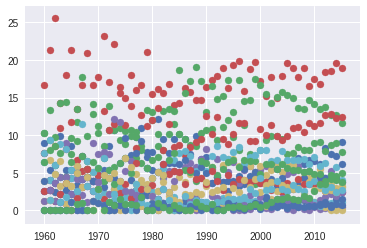

In [356]:
for genre in unique(df['genres']):
    plt.scatter(y = new_df1[genre], x = new_df1['year']);
    #plt.legend()

This graph looks very messy. Let's see the mean value of occurrence for each genre:

In [357]:
mean = {}
for _ in new_df1.columns[1:]: # coz firt row is year column
    mean[_] = np.mean(new_df1[_])
mean

{'Action': 9.1828419473096972,
 'Adventure': 5.9779389384966946,
 'Animation': 1.8724954892280661,
 'Comedy': 13.365996728567213,
 'Crime': 5.3555985671491584,
 'Documentary': 1.0017009269842234,
 'Drama': 17.61906181368045,
 'Family': 4.2369321559049373,
 'Fantasy': 3.2695122162267043,
 'Foreign': 0.6238363396628035,
 'History': 1.6829865578705412,
 'Horror': 6.1818010746638166,
 'Music': 1.6829654289355405,
 'Mystery': 3.2749736429518452,
 'Romance': 6.2917169021594521,
 'Science Fiction': 4.796821514598796,
 'TV Movie': 0.47162588046601528,
 'Thriller': 10.042593415974052,
 'War': 1.5115212996926917,
 'Western': 1.5570791594773035}

I am dropping all the genres except the top 5 ones.

In [358]:
top_5 = []
for _ in new_df1.columns[1:]:
    top_5.append(np.mean(new_df1[_]))
    top_5.sort(reverse = True)
top_5[:5]

[17.61906181368045,
 13.365996728567213,
 10.042593415974052,
 9.1828419473096972,
 6.2917169021594521]

These top 5 mean values are for Drama, Comedy, Thriller, Action, Romance. Now, visualising trends only for these genres:

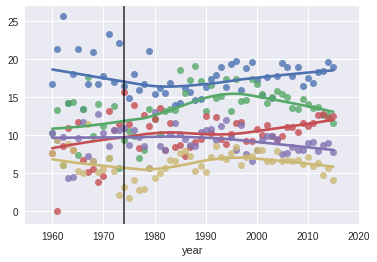

In [359]:
import seaborn as sns
g = ['Drama','Comedy','Thriller','Action','Romance']
for genre in g:
    plot = sns.regplot(y = new_df1[genre], x = new_df1['year'], lowess = True);
plot.set_ylabel("");
plot.axvline(x = 1974, color = 'black', alpha = 0.7);

### Research Question 2: What kinds of properties are associated with movies that have high revenues?

In [360]:
df.head()

,popularity,budget,revenue,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10152,0.333643,0,0,Peter Cushing|Martita Hunt|Yvonne Monlaur|Fred...,Terence Fisher,85,Horror,1960-01-02,19,6.6,1960,0.0,0.0
10150,0.421043,0,0,Burt Lancaster|Audrey Hepburn|Audie Murphy|Joh...,John Huston,125,Action|Drama|Western,1960-01-02,17,4.9,1960,0.0,0.0
10162,0.194948,0,0,Kenneth More|Dana Wynter|Carl MÃ¶hner|Laurence...,Lewis Gilbert,97,Action|Drama|Foreign|History|War,1960-02-12,12,4.9,1960,0.0,0.0
10166,0.136525,0,0,Kenneth Connor|Charles Hawtrey|Sid James|Kenne...,Gerald Thomas,86,Comedy,1960-02-23,10,6.0,1960,0.0,0.0
10156,0.267118,0,0,Randolph Scott|Nancy Gates|Skip Homeier|Dyke J...,Budd Boetticher,73,Action|Western,1960-03-02,12,6.5,1960,0.0,0.0


Taking inflation into account. Removing `budget` and `revenue` columns:

In [361]:
df.drop(['revenue', 'budget'], axis = 1, inplace = True)

In [362]:
df.head()

,popularity,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10152,0.333643,Peter Cushing|Martita Hunt|Yvonne Monlaur|Fred...,Terence Fisher,85,Horror,1960-01-02,19,6.6,1960,0.0,0.0
10150,0.421043,Burt Lancaster|Audrey Hepburn|Audie Murphy|Joh...,John Huston,125,Action|Drama|Western,1960-01-02,17,4.9,1960,0.0,0.0
10162,0.194948,Kenneth More|Dana Wynter|Carl MÃ¶hner|Laurence...,Lewis Gilbert,97,Action|Drama|Foreign|History|War,1960-02-12,12,4.9,1960,0.0,0.0
10166,0.136525,Kenneth Connor|Charles Hawtrey|Sid James|Kenne...,Gerald Thomas,86,Comedy,1960-02-23,10,6.0,1960,0.0,0.0
10156,0.267118,Randolph Scott|Nancy Gates|Skip Homeier|Dyke J...,Budd Boetticher,73,Action|Western,1960-03-02,12,6.5,1960,0.0,0.0


Let's see the distribution of `revenue_adj` column:

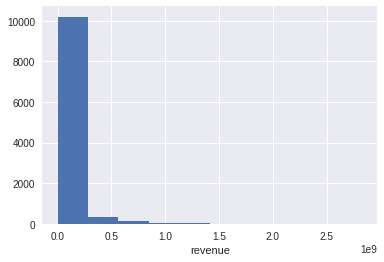

In [363]:
plt.hist(x = df['revenue_adj']);
plt.xlabel('revenue');

This is skewed distribution. Let's see the summary of `revenue_adj` column:

In [364]:
df['revenue_adj'].describe()

count    1.073100e+04
mean     5.200623e+07
std      1.454252e+08
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.470546e+07
max      2.827124e+09
Name: revenue_adj, dtype: float64

Minimum value in `revenue_adj` is 0. That's why our distribution is skewed. Let's see how many such rows are there.

In [365]:
# minimum value of revenue is 0.
df[df['revenue_adj'] == min(df['revenue_adj'])].shape[0], 100*(df[df['revenue_adj'] == min(df['revenue_adj'])].shape[0])/df.shape[0]

(5888, 54.86907091603765)

5888 movies have no revenue. It is more than 50% of `df`.This will skew our distribution for `revenue_adj` column.<br>In order to correctly know the properties of high revenue movies, it is important to remove movies which have no revenue.

In [366]:
df_r2 = df.query("revenue_adj != 0")

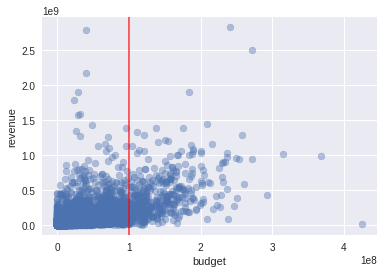

In [367]:
plt.scatter(x = df_r2["budget_adj"], y = df_r2['revenue_adj'],alpha = 0.4);
plt.xlabel("budget");
plt.ylabel("revenue");
plt.axvline(x = 100000000, color = 'red', alpha = 0.7);

From the scatterplot, it is clear that revenue is not strongly dependent on budget of movie. There are few movies which have high revenue. Budget of most of the movies is less than $100m. 

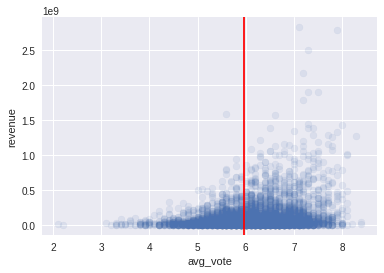

In [368]:
plt.scatter(x = df_r2['vote_average'],y = df_r2['revenue_adj'], alpha = 0.1);
plt.xlabel("avg_vote");
plt.ylabel("revenue");
plt.axvline(x = np.mean(df['vote_average']), color = 'red');

This graph shows that high revenue movies have voting above average.

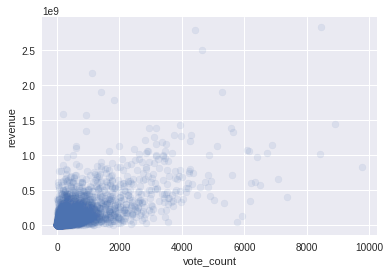

In [369]:
plt.scatter(df_r2["vote_count"], df_r2['revenue_adj'], alpha = 0.1);
plt.xlabel("vote_count");
plt.ylabel("revenue");

There is a positive correlation between revenue and vote_count but not strong enough to make any conclusion.

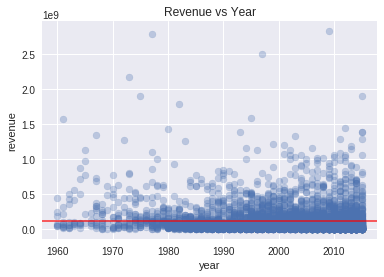

In [370]:
plt.scatter(x = df_r2['release_year'], y = df_r2['revenue_adj'], alpha = 0.3);
plt.xlabel('year');
plt.ylabel('revenue');
plt.axhline(y = np.mean(df_r2['revenue_adj']), color = 'red', alpha = 0.7)
plt.title('Revenue vs Year');

The increasing density of blue color shows that number of high revenue movies has increased from 1960 to 2015. The red line is for mean of `revenue_adj` column.

### Research Question 3: Which movie are popular year by year?

In [371]:
df['popularity'].describe()

count    10731.000000
mean         0.652615
std          1.004804
min          0.000188
25%          0.210765
50%          0.387081
75%          0.720889
max         32.985763
Name: popularity, dtype: float64

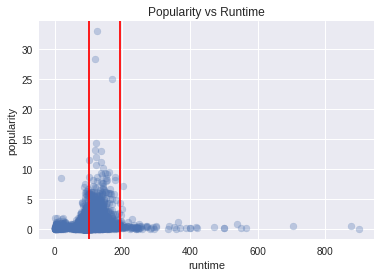

In [372]:
plt.scatter(x = df['runtime'],y = df['popularity'], alpha = 0.3)
plt.axvline(x = df['runtime'].mean(), color = "red");
plt.axvline(x = np.mean(df['runtime']) + 3*np.std(df['runtime']), color = 'red')
plt.xlabel("runtime");
plt.ylabel("popularity");
plt.title('Popularity vs Runtime');

In [373]:
np.std(df['runtime'])

30.492451716812749

In [374]:
df['runtime'].mean()

102.46882862734135

Average runtime of movies is around 102 minute. All the  popular movies have runtime more than 102 minute. First vertical line is for `np.mean(df['runtime'])` and second vertical line is for `np.mean(df['runtime']) + 3*np.std(df['runtime'])`.

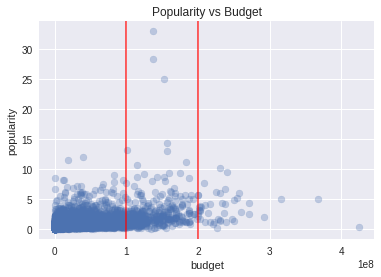

In [375]:
plt.scatter(x = df['budget_adj'], y = df['popularity'], alpha = 0.3);
plt.xlabel('budget');
plt.ylabel('popularity');
plt.title('Popularity vs Budget');
plt.axvline(x = 100000000, color = 'red', alpha = 0.7);
plt.axvline(x = 200000000, color = 'red', alpha = 0.7);

Popular movies have budget between $100m and 200m.

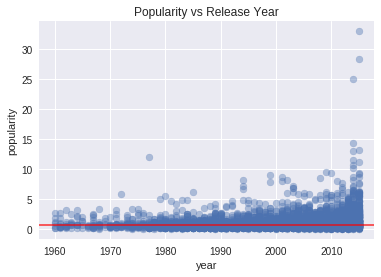

In [376]:
plt.scatter(x = df_r2['release_year'], y = df_r2['popularity'],alpha= 0.4);
plt.xlabel('year');
plt.ylabel('popularity');
plt.title('Popularity vs Release Year');
plt.axhline(y = np.mean(df['popularity']), color = 'red', alpha = 0.7);

Popularity of movies has increased from 1960 to 2015, 2015 showing the highest popularity movies.

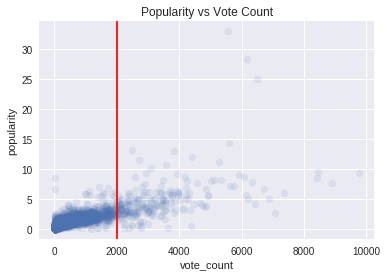

In [377]:
plt.scatter(x = df['vote_count'], y = df['popularity'], alpha = 0.1);
plt.xlabel('vote_count');
plt.ylabel('popularity');
plt.axvline(x = 2000, color = 'red');
plt.title('Popularity vs Vote Count');


Above graph shows that popular movies have high vote count, wheras all the less popular movies have vote count less than 2000. The vertical line shows this trend.

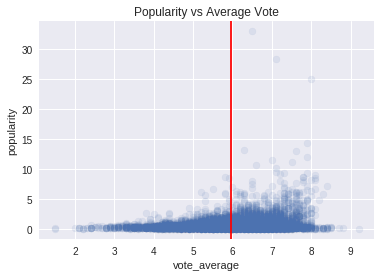

In [378]:
plt.scatter(x = df['vote_average'], y = df['popularity'], alpha = 0.1);
plt.xlabel('vote_average');
plt.ylabel('popularity');
plt.axvline(x = np.mean(df['vote_average']), color = "red");
plt.title('Popularity vs Average Vote');

Popular movies also have above average voting.

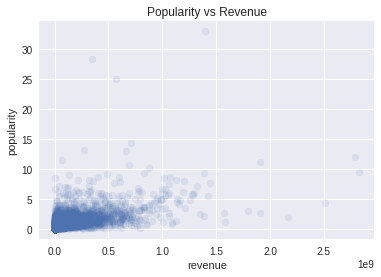

In [379]:
plt.scatter(x = df['revenue_adj'], y = df['popularity'], alpha = 0.1);
plt.xlabel('revenue');
plt.ylabel('popularity');
plt.title('Popularity vs Revenue');

There is no conclusion regarding popularity of a movie with its revenue.

<a id='conclusions'></a>
## Conclusions

### Research Question 1
Most popular genres from 1960-2015 are Drama, Comedy, Thriller, Action and Romance respectively. Drama and comedy movies are consistently on top 2 spots, but there are some position shifting in thriller and action movies around year 1974. From 1974, popularity of action movies have declined. Fifth spot comes for romance movies.
### Research Question 2
I had to remove half of the entries in `revenue_adj` column to see the properties of **high-revenue** movies. There was no appropriate dependency of revenue on budget. Most of the high revenue generating movies have voting above average. As the average voting for a movie increased, its revenue also increased. If we try curve fitting for `revenue_adj` vs `vote_average` column then we would get an upward parabola or exponential.

### Research Question 3
Most of the popular movies have their runtime equal to or more than the average of `runtime` column. The vertical lines show this trend. The budget for the popular movies is between $100m and 200m , but I have not shown the exact budget values because it is not equal to any statistic of `budget_adj` column. Popularity and interest in movies have increase from time to time. In the **Popularity vs Year** graph, we can see that 2015 saw highest popular movies of all time. **Popularity vs Average Voting** graph shows that all popular movies have above average voting.

In [381]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0